Gerekli kütüphaneler aşağıda verilmiştir.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kmeans import KMeansClusterClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
from dt import DecisionTreeClassifier

Data okunması ve anlamsız olan Id sütununun atılması görülmektedir.

In [2]:
data = pd.read_csv('Iris.csv')
data = data.drop('Id', axis=1)

Tür isimlerinin dönüştürülmesi için class mapping oluşturuldu ve buna göre isimlendirmeler 0, 1, 2'ye dönüştürüldü.

In [3]:
class_mapping = {
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2
}
data['Species'] = data['Species'].map(class_mapping)

Data hedef ve öznitelikler matrisleri olarak ikiye ayrıldı. Test ve Eğitim seti, test setinin verinin %20'sini oluşturacak şekilde ayrılması kütüphane kullanarak sağlandı. Ayrıca sütun vektörü olarak elde edilen y verisi satır vektörüne dönüştürüldü.

In [4]:
data_list = data.values.tolist()
X = [row[:4]for row in data_list]
y = [row[4:5]for row in data_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def col_to_row(y):
    X = []
    for i in y:
        if i == [0.0]:
            X.append(0)    
        elif i == [1.0]:
            X.append(1)
        elif i == [2.0]:
            X.append(2)
    return X
y = col_to_row(y)
y_test = col_to_row(y_test)
y_train = col_to_row(y_train)

Euclidean Distance hesabı için bir method tanımlanmıştır.

In [5]:
def squared_distance(p1, p2):
    return sum((x - y) ** 2 for x, y in zip(p1, p2))

Tanımlanan KMeansClusterClassifier class'ına göre değişken cluster sayısı için modelin eğitilmesi ve tahmin yapması görülmektedir.

In [6]:
L = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
distances = []

for depth in L:
    KMeans_classifier = KMeansClusterClassifier(n_cluster=depth, max_iterations=1000)
    KMeans_classifier.fit(X_train, y_train)
    centroids=KMeans_classifier.cluster_centers
    temp=0
    for r in X_train:
        closesest_dist = 9223372036854775806
        for center in centroids:
            distance = squared_distance(r,center)
            if distance < closesest_dist:
                closesest_dist = distance
        temp+=closesest_dist
    distances.append(temp/len(X_train))


Elbow point belirlenmesi için yukarıda hesaplanan distances değişkeni ile k değerlerini tutan L değişkeninin grafiği çizdirilmiştir.

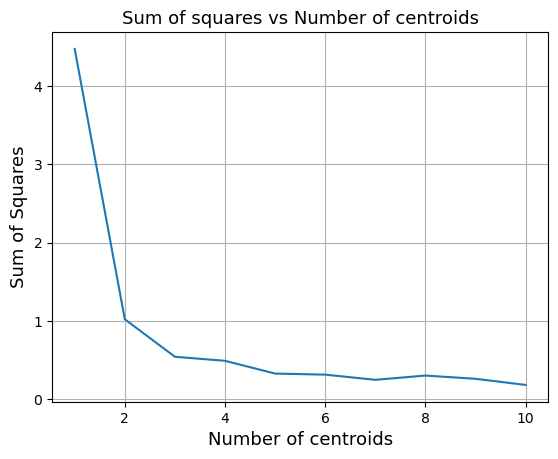

In [7]:
fig = plt.figure(1)
plt.title("Sum of squares vs Number of centroids", fontsize='13')
plt.plot(L, distances)
plt.xlabel("Number of centroids",fontsize='13')
plt.ylabel("Sum of Squares",fontsize='13')
plt.grid()
plt.show()

Bu grafiğe bakıldığı zaman en iyi sonucu veren k değerinin 3 olduğu gözlenmektedir.

In [8]:
KMeans_classifier = KMeansClusterClassifier(n_cluster=3, max_iterations=100)
KMeans_classifier.fit(X_train, y_train)
y_pred_test = KMeans_classifier.predict(X_test)
KMeans_classifier.fit(X_train, y_train)
y_pred_train = KMeans_classifier.predict(X_train)

Performans ölçümü için fonksiyon tanımlanmıştır. Bu fonksiyon TN TP FN FP değerlerini kullanarak accuracy precision f1 ve recall değerlerini hesaplamaktadır.

In [9]:
def perf(y_test, y_pred_test):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred_test)): 
        if y_test[i]==y_pred_test[i]==2:
           TN += 1
        if y_pred_test[i]==2 and y_test[i]!=y_pred_test[i]:
           FN += 1
        if y_test[i]==y_pred_test[i]==1:
           TP += 1
        if y_pred_test[i]==1 and y_test[i]!=y_pred_test[i]:
           FP += 1
        if y_test[i]==y_pred_test[i]==0:
           TN += 1
        if y_pred_test[i]==0 and y_test[i]!=y_pred_test[i]:
           FN += 1
    Precision = TP/(FP+TP)
    Recall = TP/(FN+TP)
    Accuracy = (TP + TN)/ (TP + FN + TN + FP)
    F1 = 2 * (Precision * Recall ) / (Precision+Recall)
    return(Accuracy, Recall, Precision, F1)

Confusion matrix oluşturulması ve test hedef verisi ile modelin tahmin ettiği test sonuçlarının karşılaştırılması görülmektedir. Accuracy, precision, recall ve f1-scor hesaplanmıştır. Bu performans ölçüm değerleri ikili sınıflandırma için doğrudan kullanılabilirken burada her bir sınıf için ayrı ayrı hesaplanıp ortalamaları 'micro' parametresine uygun olarak alınmıştır. Değerlerin modelin iyi bir performansa sahip olduğunu göstermektedir.


Accuracy_Test_K: 0.97
Precision_Test_K: 1.00
Recall_Test_K: 0.90
F1_score_Test_K: 0.95


<Axes: >

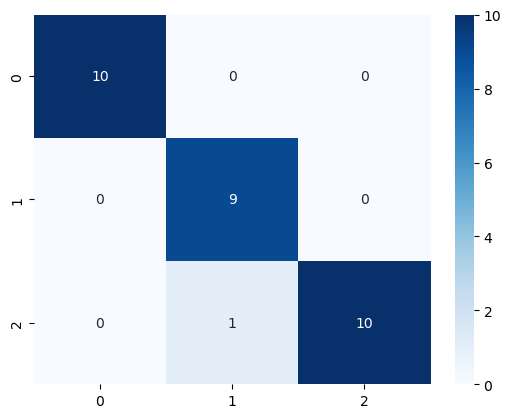

In [10]:
cm_test = confusion_matrix(y_test, y_pred_test)

Accuracy_Test_K, Precision_Test_K, Recall_Test_K, F1_score_Test_K = perf(y_test, y_pred_test)

print('\nAccuracy_Test_K: {:.2f}'.format(Accuracy_Test_K))
print('Precision_Test_K: {:.2f}'.format(Precision_Test_K))
print('Recall_Test_K: {:.2f}'.format(Recall_Test_K))
print('F1_score_Test_K: {:.2f}'.format(F1_score_Test_K))

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')


Accuracy_Train_K: 0.89

Precision_Train_K: 0.71

Recall_Train_K: 0.97

F1_score_Train_K: 0.82



<Axes: >

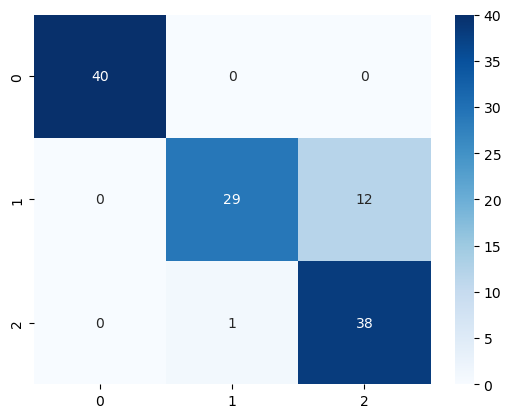

In [11]:
cm_train = confusion_matrix(y_train, y_pred_train)

Accuracy_Train_K, Precision_Train_K, Recall_Train_K, F1_score_Train_K = perf(y_train, y_pred_train)

print('\nAccuracy_Train_K: {:.2f}\n'.format(Accuracy_Train_K))
print('Precision_Train_K: {:.2f}\n'.format(Precision_Train_K))
print('Recall_Train_K: {:.2f}\n'.format(Recall_Train_K))
print('F1_score_Train_K: {:.2f}\n'.format(F1_score_Train_K))

sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')

ROC curve KMeans modeli için hem test hem train için çizdirilmiştir. Setosa için yanlış sınıflandırma olmadan doğru sınıflandırma mümkünken diğer türlerde yanlış sınıflandırma ihtimali de olmuştur.

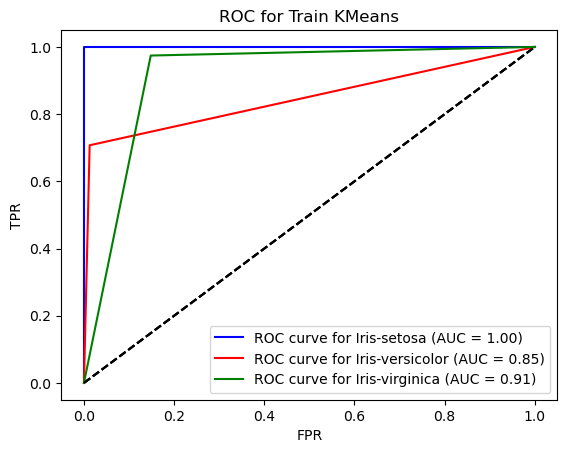

In [12]:
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
n_classes = y_train_bin.shape[1]

y_pred_train_bin = label_binarize(y_pred_train, classes=[0, 1, 2])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i],_ = metrics.roc_curve(y_train_bin[:, i], y_pred_train_bin[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
plt.figure()
for i in range(n_classes):
    color = "blue" if i==0 else "red" if i ==1 else "green"
    species = "Iris-setosa" if i==0 else "Iris-versicolor" if i ==1 else "Iris-virginica"
    plt.plot(fpr[i], tpr[i], label='ROC curve for %s (AUC = %0.2f)' % (species,roc_auc[i]),color=color)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC for Train KMeans')
plt.legend(loc="lower right")
plt.show()

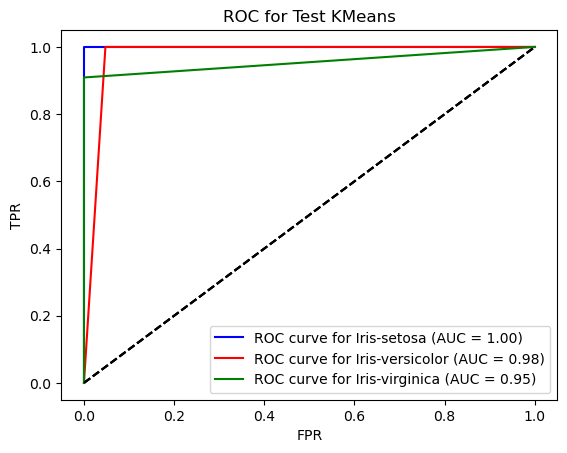

In [13]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

y_pred_test_bin = label_binarize(y_pred_test, classes=[0, 1, 2])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i],_ = metrics.roc_curve(y_test_bin[:, i], y_pred_test_bin[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
plt.figure()
for i in range(n_classes):
    color = "blue" if i==0 else "red" if i ==1 else "green"
    species = "Iris-setosa" if i==0 else "Iris-versicolor" if i ==1 else "Iris-virginica"
    plt.plot(fpr[i], tpr[i], label='ROC curve for %s (AUC = %0.2f)' % (species,roc_auc[i]),color=color)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC for Test KMeans')
plt.legend(loc="lower right")
plt.show()

Kıyaslama yapmak için önceden yazılan Decision tree classifier sınıfı ile de model eğitilmiştir ve performansı ölçülmüştür.


Accuracy_Test_DTC: 1.00
Precision_Test_DTC: 1.00
Recall_Test_DTC: 1.00
F1_score_Test_DTC: 1.00


<Axes: >

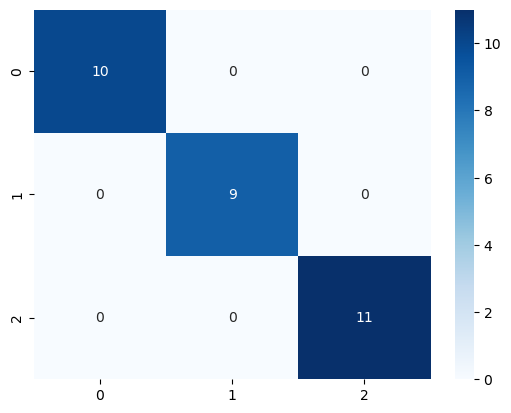

In [14]:
dt_classifier = DecisionTreeClassifier(max_depth=3)
dt_classifier.fit(X_train, y_train)
y_pred_test = dt_classifier.predict(X_test)
y_pred_train = dt_classifier.predict(X_train)

cm_test = confusion_matrix(y_test, y_pred_test)

Accuracy_Test_DTC, Recall_Test_DTC, Precision_Test_DTC, F1_score_Test_DTC = perf(y_test, y_pred_test)

print('\nAccuracy_Test_DTC: {:.2f}'.format(Accuracy_Test_DTC))
print('Precision_Test_DTC: {:.2f}'.format(Precision_Test_DTC))
print('Recall_Test_DTC: {:.2f}'.format(Recall_Test_DTC))
print('F1_score_Test_DTC: {:.2f}'.format(F1_score_Test_DTC))

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')


Accuracy_Train_DTC: 0.96
Precision_Train_DTC: 0.98
Recall_Train_DTC: 0.91
F1_score_Train_DTC: 0.94


<Axes: >

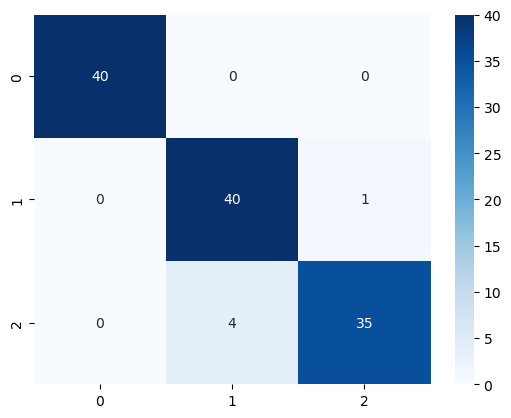

In [15]:
cm_train = confusion_matrix(y_train, y_pred_train)

Accuracy_Train_DTC, Precision_Train_DTC, Recall_Train_DTC, F1_score_Train_DTC = perf(y_train, y_pred_train)

print('\nAccuracy_Train_DTC: {:.2f}'.format(Accuracy_Train_DTC))
print('Precision_Train_DTC: {:.2f}'.format(Precision_Train_DTC))
print('Recall_Train_DTC: {:.2f}'.format(Recall_Train_DTC))
print('F1_score_Train_DTC: {:.2f}'.format(F1_score_Train_DTC))

sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')

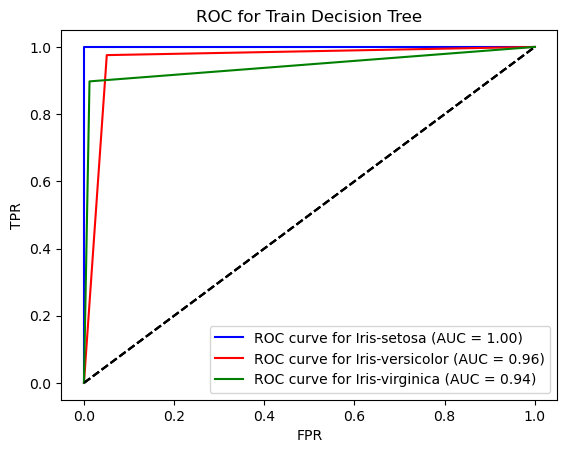

In [16]:
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
n_classes = y_train_bin.shape[1]

y_pred_train_bin = label_binarize(y_pred_train, classes=[0, 1, 2])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i],_ = metrics.roc_curve(y_train_bin[:, i], y_pred_train_bin[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
plt.figure()
for i in range(n_classes):
    color = "blue" if i==0 else "red" if i ==1 else "green"
    species = "Iris-setosa" if i==0 else "Iris-versicolor" if i ==1 else "Iris-virginica"
    plt.plot(fpr[i], tpr[i], label='ROC curve for %s (AUC = %0.2f)' % (species,roc_auc[i]),color=color)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC for Train Decision Tree')
plt.legend(loc="lower right")
plt.show()

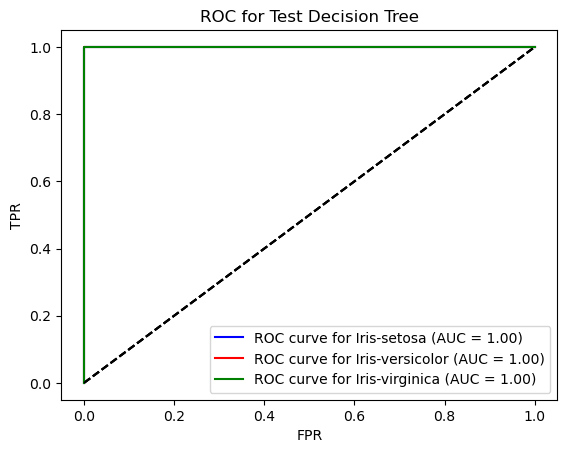

In [17]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

y_pred_test_bin = label_binarize(y_pred_test, classes=[0, 1, 2])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i],_ = metrics.roc_curve(y_test_bin[:, i], y_pred_test_bin[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
plt.figure()
for i in range(n_classes):
    color = "blue" if i==0 else "red" if i ==1 else "green"
    species = "Iris-setosa" if i==0 else "Iris-versicolor" if i ==1 else "Iris-virginica"
    plt.plot(fpr[i], tpr[i], label='ROC curve for %s (AUC = %0.2f)' % (species,roc_auc[i]),color=color)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC for Test Decision Tree')
plt.legend(loc="lower right")
plt.show()

Decision tree classifier ve KMeans modelinin kıyaslanması için aşağıda performans ölçümünden alınan sonuçlar tablo haline getirilmiş olup kıyaslanmıştır. Tabloya bakıldığı zaman Decision tree classifier'ın bu veride daha iyi performans gösterdiği anlaşılmıştır. Bunun sebebi KMeans modelinde değerlerin hem başlangıc merkez noktası seçiminden de etkilenmesi ve sadece uzaklığa bakarak uzayı daha az parçaya bölerek bir model eğitimi gerçekleştiği için uzayı daha çok böldüğümüz ve uzaklıktan ziyade öznitelik özelinde böldüğümüz için daha iyi bir sonuç gelmiştir.

In [18]:
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Test_DTC': [Accuracy_Test_DTC, Precision_Test_DTC, Recall_Test_DTC, F1_score_Test_DTC],
    'Train_DTC': [Accuracy_Train_DTC, Precision_Train_DTC, Recall_Train_DTC, F1_score_Train_DTC],
    'Test_K': [Accuracy_Test_K, Precision_Test_K, Recall_Test_K, F1_score_Test_K],
    'Train_K': [Accuracy_Train_K, Precision_Train_K, Recall_Train_K, F1_score_Train_K],
}
df = pd.DataFrame(data)
df.set_index('Metric', inplace=True)
print(df)

           Test_DTC  Train_DTC    Test_K   Train_K
Metric                                            
Accuracy        1.0   0.958333  0.966667  0.891667
Precision       1.0   0.975610  1.000000  0.707317
Recall          1.0   0.909091  0.900000  0.966667
F1-score        1.0   0.941176  0.947368  0.816901
